In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
!pwd

/home/users/russelld/VladBranch_SepConv2D/work/SepConv2D_hls4ml/ModelTesting


In [4]:
rf_pf_df = pd.read_json("/home/users/russelld/VladBranch_SepConv2D/work/SepConv2D_hls4ml/HLS4ML_PROJ_sepConv2D/Parallelization/report.json")
prec_df = pd.read_json("/home/users/russelld/VladBranch_SepConv2D/work/SepConv2D_hls4ml/HLS4ML_PROJ_sepConv2D/precision/report.json")
#dim_df = pd.read_json("/home/users/russelld/VladBranch_SepConv2D/work/SepConv2D_hls4ml/HLS4ML_PROJ_sepConv2D/dimensions/report.json")

# Debugging Dimensions Data

In [5]:
import json

In [6]:
# Load JSON data
with open("/home/users/russelld/VladBranch_SepConv2D/work/SepConv2D_hls4ml/HLS4ML_PROJ_sepConv2D/dimensions/report.json") as f:
    data = json.load(f)

In [11]:
for key in data.keys():
    try:
        print(len(data[key]), key)
    except TypeError:
        print('ERROR: The Key is: ', key, "with length: ", len(key))

397 MemAddress
398 Precision
ERROR: The Key is:  rf with length:  2
397 pf
397 Input_Height
397 Input_Width
397 Channels
397 Filter_Height
397 Filter_Width
397 Filters
397 Synthesis_Time
397 Compilation_time
397 BRAM
397 DSP
397 FF
397 LUT
397 BestLatency
397 WorstLatency
397 IntervalMin
397 IntervalMax
397 width_check


In [12]:
data["rf"] = np.ones(len(data["pf"])) #makes "rf" data the same length

In [13]:
data["Precision"].pop() #removes duplicated last element to have all the same length

'fixed<14,6>'

In [14]:
len(data["Precision"])

397

Turn the already fixed data into the pandas dataframe I need...

In [15]:
dim_df = pd.DataFrame(data)

# RF and PF Study

In [5]:
rf_pf_df

,MemAdress,Precision,rf,pf,Input_Height,Input_Width,Channels,Filter_Height,Filter_Width,Filters,Synthesis_Time,Compilation_time,BRAM,DSP,FF,LUT,BestLatency,WorstLatency,IntervalMin,IntervalMax
0,139763270028992,"FXD<14,6>",1,144,12,12,2,3,3,5,376.916582,8.400630,1,659,27310,61416,172,172,170,170
1,139762330220608,"FXD<14,6>",1,72,12,12,2,3,3,5,373.414083,8.873301,1,659,27310,61416,172,172,170,170
2,139761793159296,"FXD<14,6>",1,48,12,12,2,3,3,5,380.490688,8.387530,1,659,27310,61416,172,172,170,170
3,139761793732992,"FXD<14,6>",1,32,12,12,2,3,3,5,383.642180,8.438526,1,659,27310,61416,172,172,170,170
4,139761258660672,"FXD<14,6>",1,16,12,12,2,3,3,5,376.413726,8.375407,1,659,27310,61416,172,172,170,170
5,139761259171136,"FXD<14,6>",1,8,12,12,2,3,3,5,377.180065,8.392428,1,659,27310,61416,172,172,170,170
6,139760724132992,"FXD<14,6>",1,4,12,12,2,3,3,5,377.011096,8.408780,1,659,27310,61416,172,172,170,170
7,139760724823744,"FXD<14,6>",2,144,12,12,2,3,3,5,418.548619,8.409973,1,654,38688,62332,186,186,185,185
8,139763403972288,"FXD<14,6>",8,144,12,12,2,3,3,5,390.044797,8.450838,1,651,40560,57462,464,464,465,465
9,139760726451648,"FXD<14,6>",16,144,12,12,2,3,3,5,367.378706,8.416687,1,650,46876,60086,926,926,927,927


Text(0.5, 0, 'Iteration Number')

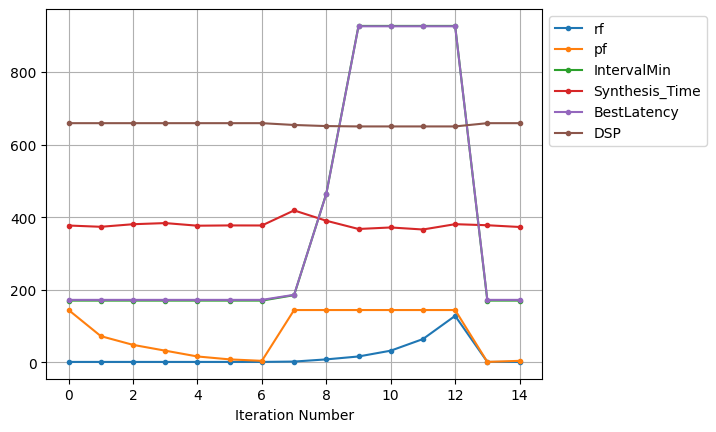

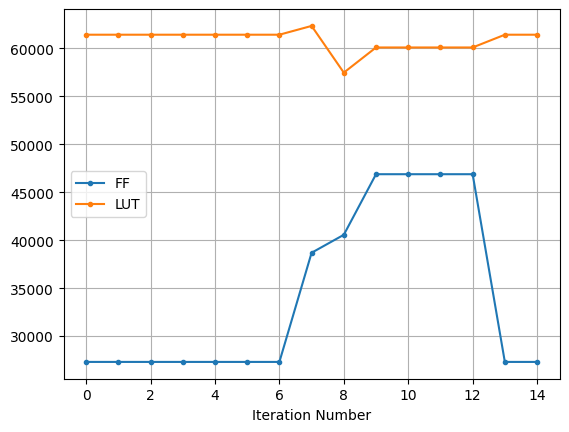

In [38]:
ax = rf_pf_df[["rf", "pf", 'IntervalMin', "Synthesis_Time", 'BestLatency', 'DSP']].plot.line(marker = "o", ms=3)
plt.grid(True)
plt.xlabel("Iteration Number")
ax.legend( bbox_to_anchor=(1, 1))
###########
rf_pf_df[["FF", "LUT"]].plot.line(marker = "o", ms=3)
plt.grid(True)
plt.xlabel("Iteration Number")

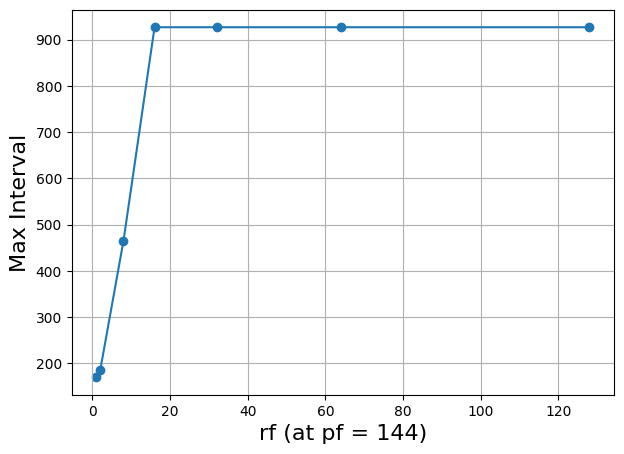

In [15]:
pf144_df = rf_pf_df.loc[rf_pf_df['pf'] == 144]
pf144_df.plot(x= 'rf', y = 'IntervalMax', kind='line', legend=False, figsize=(7,5))
#rf1_df.plot(x= 'pf', y = 'IntervalMax', kind='scatter', legend=False, figsize=(7,5))
#plt.plot(rf1_df['pf'], rf1_df['IntervalMax'])
plt.scatter(pf144_df['rf'], pf144_df['IntervalMax'])
plt.ylabel("Max Interval", fontsize=16)
plt.xlabel("rf (at pf = 144)", fontsize=16)
plt.grid(True)

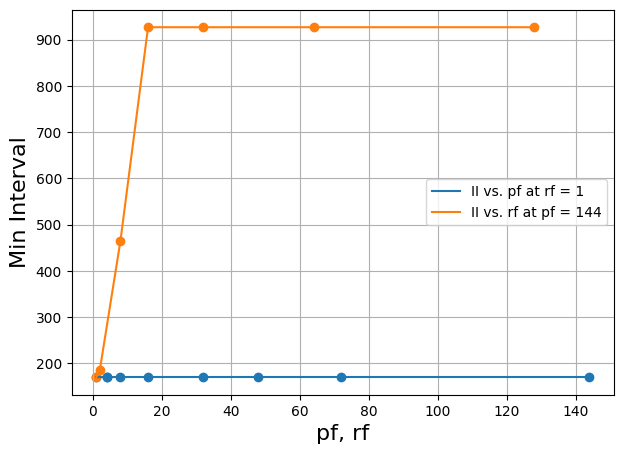

In [28]:
rf1_df = rf_pf_df.loc[rf_pf_df['rf'] == 1]
rf1_df.plot(x= 'pf', y = 'IntervalMin', kind='line', legend=False, figsize=(7,5), label='II vs. pf at rf = 1')
#rf1_df.plot(x= 'pf', y = 'IntervalMax', kind='scatter', legend=False, figsize=(7,5))
#plt.plot(rf1_df['pf'], rf1_df['IntervalMax'])
plt.scatter(rf1_df['pf'], rf1_df['IntervalMin'])

#pf144_df.plot(x= 'rf', y = 'IntervalMax', kind='line', legend=False, figsize=(7,5))
plt.plot(pf144_df['rf'], pf144_df['IntervalMin'], label="II vs. rf at pf = 144")
plt.scatter(pf144_df['rf'], pf144_df['IntervalMin'])

plt.ylabel("Min Interval", fontsize=16)
plt.xlabel("pf, rf", fontsize=16)
plt.legend()
plt.grid(True)

### Input Precision

In [22]:
prec_df = prec_df.set_index("Precision")

In [23]:
prec_df

,rf,pf,Input_Height,Input_Width,Channels,Filter_Height,Filter_Width,Filters,Synthesis_Time,Compilation_time,BRAM,DSP,FF,LUT,BestLatency,WorstLatency,IntervalMin,IntervalMax
Precision,,,,,,,,,,,,,,,,,,
"FXD<32,16>",1,1,12,12,2,3,3,5,279.528744,8.221063,1,668,25342,59878,152,152,151,151
"FXD<32,12>",1,1,12,12,2,3,3,5,277.251276,8.316811,1,668,25342,59878,152,152,151,151
"FXD<32,8>",1,1,12,12,2,3,3,5,275.568892,8.284957,1,668,25342,59878,152,152,151,151
"FXD<32,6>",1,1,12,12,2,3,3,5,273.633785,8.309982,1,668,25342,59570,152,152,151,151
"FXD<32,3>",1,1,12,12,2,3,3,5,302.895233,8.325248,1,668,25648,61686,169,169,168,168
"FXD<24,16>",1,1,12,12,2,3,3,5,279.093618,8.415308,1,668,22666,59666,158,158,157,157
"FXD<24,12>",1,1,12,12,2,3,3,5,286.782326,8.400160,1,668,23038,59878,152,152,151,151
"FXD<24,8>",1,1,12,12,2,3,3,5,274.359684,8.409069,1,668,23038,59878,152,152,151,151
"FXD<24,6>",1,1,12,12,2,3,3,5,279.597744,8.469894,1,668,23038,59570,152,152,151,151


In [33]:
prec_df.index

Index(['FXD<32,16>', 'FXD<32,12>', 'FXD<32,8>', 'FXD<32,6>', 'FXD<32,3>',
       'FXD<24,16>', 'FXD<24,12>', 'FXD<24,8>', 'FXD<24,6>', 'FXD<24,3>',
       'FXD<16,16>', 'FXD<16,12>', 'FXD<16,8>', 'FXD<16,6>', 'FXD<16,3>',
       'FXD<10,10>', 'FXD<10,8>', 'FXD<10,6>', 'FXD<10,3>', 'FXD<8,8>',
       'FXD<8,6>', 'FXD<8,3>'],
      dtype='object', name='Precision')

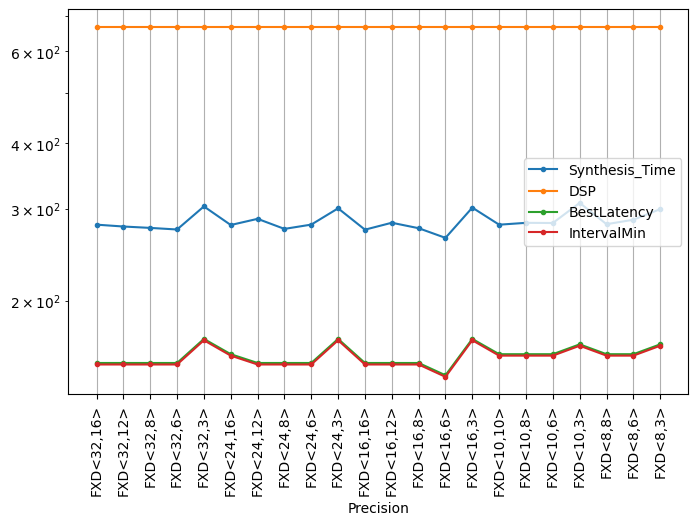

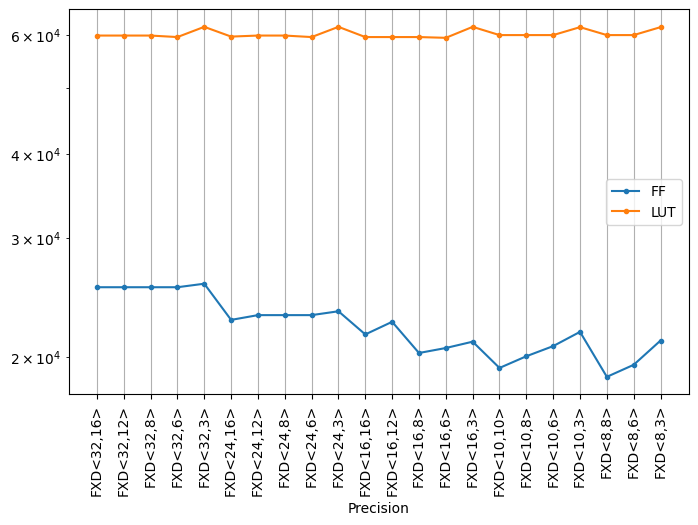

In [54]:
ax1 =prec_df[["Synthesis_Time", "DSP", "BestLatency", "IntervalMin"]].plot.line(figsize=(8,5),marker='o', ms=3,)
ax1.legend(loc="center right")#,bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
ax1.set_xticks(range(len(prec_df)))
ax1.set_xticklabels(prec_df.index)
plt.grid(True)
####
ax2 =prec_df[["FF","LUT"]].plot.line(figsize=(8,5),marker='o', ms=3,)
plt.xticks(rotation=90)
ax2.set_xticks(range(len(prec_df)))
ax2.set_xticklabels(prec_df.index)
ax2.legend(loc="center right")# bbox_to_anchor=(1, 1))
plt.grid(True)

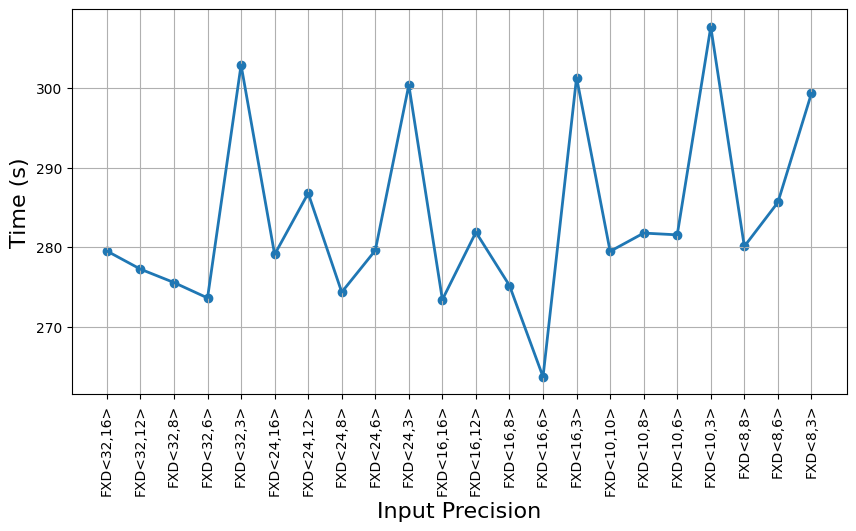

In [8]:
plt.figure(figsize=(10,5))
plt.plot(prec_df['Precision'], prec_df['Synthesis_Time'], linewidth = 2, label="Synth Time")
plt.scatter(prec_df['Precision'], prec_df['Synthesis_Time'],)
plt.xticks(rotation=90)
plt.ylabel("Time (s)", fontsize=16)
plt.xlabel("Input Precision", fontsize = 16)
plt.grid(True)

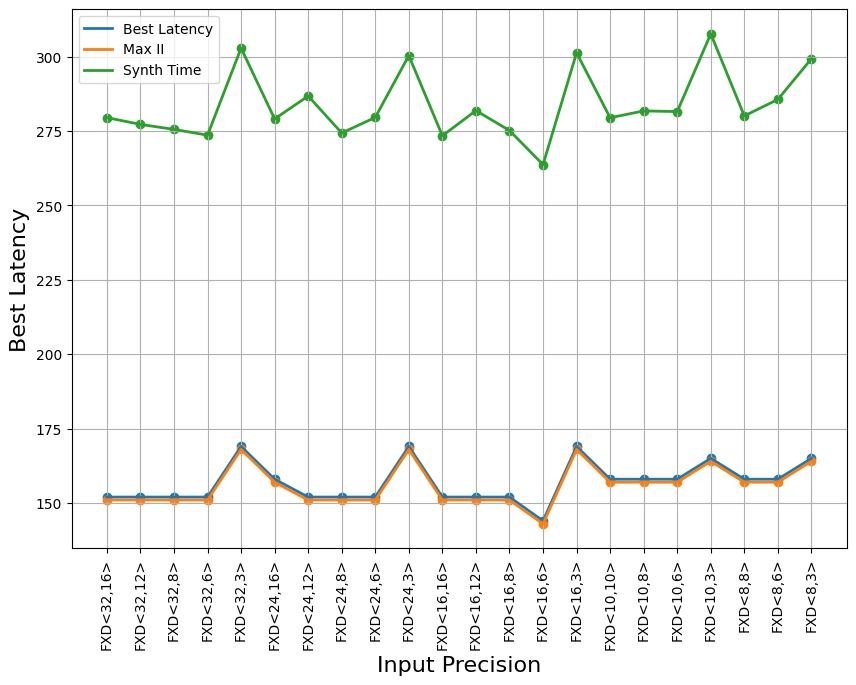

In [35]:
plt.figure(figsize=(10,7))

plt.plot(prec_df['Precision'], prec_df['BestLatency'], linewidth = 2, label= 'Best Latency')
plt.scatter(prec_df['Precision'], prec_df['BestLatency'])

plt.plot(prec_df['Precision'], prec_df['IntervalMax'], linewidth = 2, label= 'Max II')
plt.scatter(prec_df['Precision'], prec_df['IntervalMax'])

plt.plot(prec_df['Precision'], prec_df['Synthesis_Time'], linewidth = 2, label="Synth Time")
plt.scatter(prec_df['Precision'], prec_df['Synthesis_Time'],)

plt.xticks(rotation=90)
plt.ylabel("Best Latency", fontsize = 16)
plt.xlabel("Input Precision", fontsize = 16)
plt.legend()
plt.grid(True)

array([<Axes: title={'center': 'FF'}, xlabel='Precision'>,
       <Axes: title={'center': 'DSP'}, xlabel='Precision'>,
       <Axes: title={'center': 'LUT'}, xlabel='Precision'>,
       <Axes: title={'center': 'BRAM'}, xlabel='Precision'>], dtype=object)

<Figure size 640x480 with 0 Axes>

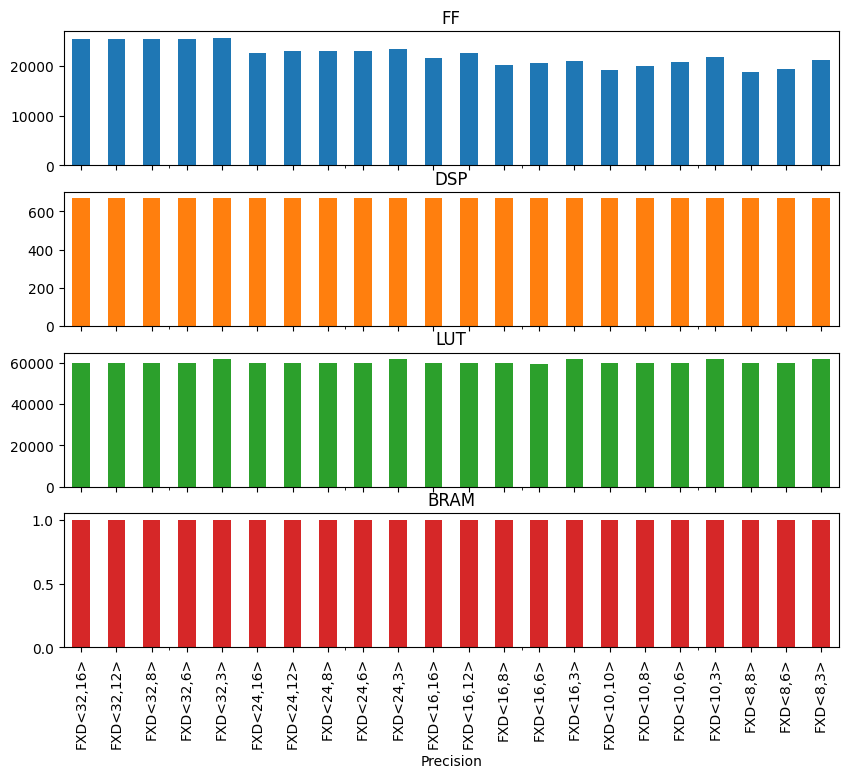

In [19]:
plt.figure()
prec_df.plot(x="Precision", y=["FF", "DSP", "LUT", "BRAM" ], kind="bar", figsize=(10,8), subplots=True,  legend=False)

# Dimensions Test

In [16]:
dim_df.keys()

Index(['MemAddress', 'Precision', 'rf', 'pf', 'Input_Height', 'Input_Width',
       'Channels', 'Filter_Height', 'Filter_Width', 'Filters',
       'Synthesis_Time', 'Compilation_time', 'BRAM', 'DSP', 'FF', 'LUT',
       'BestLatency', 'WorstLatency', 'IntervalMin', 'IntervalMax',
       'width_check'],
      dtype='object')

In [17]:
dim_df.loc[dim_df["BRAM"] == 0]

,MemAddress,Precision,rf,pf,Input_Height,Input_Width,Channels,Filter_Height,Filter_Width,Filters,...,Compilation_time,BRAM,DSP,FF,LUT,BestLatency,WorstLatency,IntervalMin,IntervalMax,width_check
116,140047343654208,"fixed<14,6>",1.0,476,17,28,2,3,3,5,...,8.548498,0,0,0,0,0,0,0,0,29


In [28]:
dim_df["DSP"] = dim_df["DSP"].astype(int) #cast strings as integers
dim_df["BestLatency"] = dim_df["BestLatency"].astype(int) #cast strings as integers
dim_df['IntervalMin'] = dim_df['IntervalMin'].astype(int) #cast strings as integers

array([<Axes: xlabel='Input_Height'>, <Axes: xlabel='Input_Height'>,
       <Axes: xlabel='Input_Height'>], dtype=object)

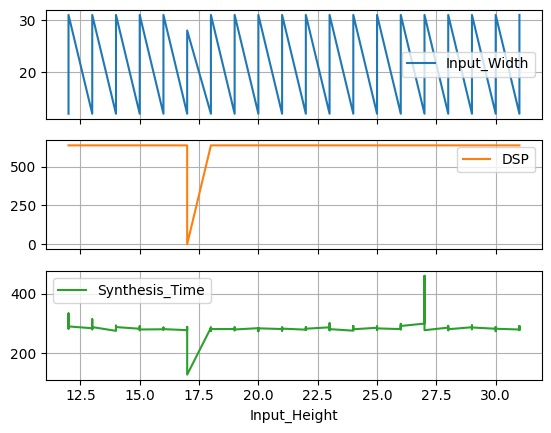

In [31]:
dim_df.plot(x = 'Input_Height', y = ['Input_Width', 'DSP' ,'Synthesis_Time'], subplots=True, grid=True)

array([<Axes: xlabel='Input_Height'>, <Axes: xlabel='Input_Height'>,
       <Axes: xlabel='Input_Height'>], dtype=object)

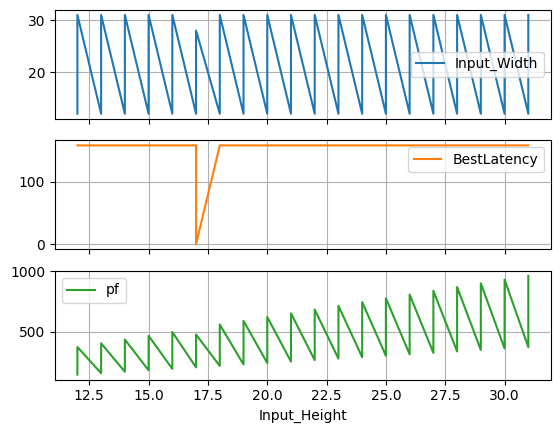

In [25]:
dim_df.plot(x = 'Input_Height', y = ['Input_Width', 'BestLatency', 'pf'], subplots=True, grid=True)

In [48]:
dim_df["DSP"][0]

'637'

array([<Axes: xlabel='Input_Height'>, <Axes: xlabel='Input_Height'>,
       <Axes: xlabel='Input_Height'>], dtype=object)

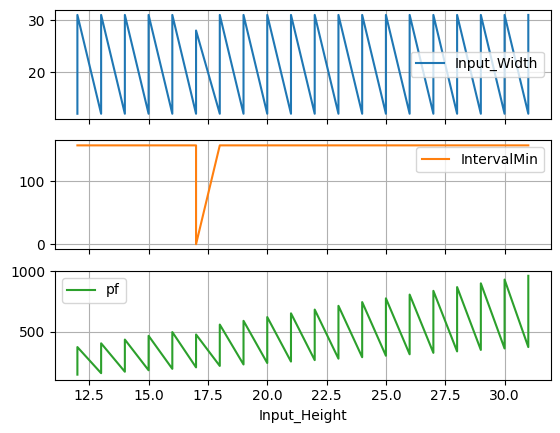

In [30]:
dim_df.plot(x = 'Input_Height', y = ['Input_Width', 'IntervalMin' ,'pf'], subplots=True, grid=True)